In [ ]:
import pandas as pd
import geopandas as gpd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import shap

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc

from imblearn.over_sampling import SMOTE
from tabulate import tabulate

# Random Forest and XG Boost

Run both models and generate SHAP summary plots. 

Class distribution:
burned
1    6782
0    2778
Name: count, dtype: int64

--- Using Features: ['burned_proportion_10m'] ---
Random Forest:
              precision    recall  f1-score   support

           0       0.50      0.47      0.48      2035
           1       0.50      0.54      0.52      2035

    accuracy                           0.50      4070
   macro avg       0.50      0.50      0.50      4070
weighted avg       0.50      0.50      0.50      4070

XGBoost:
              precision    recall  f1-score   support

           0       0.50      0.47      0.48      2035
           1       0.50      0.54      0.52      2035

    accuracy                           0.50      4070
   macro avg       0.50      0.50      0.50      4070
weighted avg       0.50      0.50      0.50      4070



ExactExplainer explainer: 4071it [00:53, 72.56it/s]                          


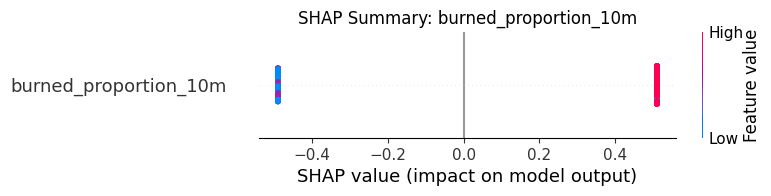


--- Using Features: ['burned_proportion_10m', 'burned_proportion_20m'] ---
Random Forest:
              precision    recall  f1-score   support

           0       0.51      0.43      0.47      2035
           1       0.51      0.60      0.55      2035

    accuracy                           0.51      4070
   macro avg       0.51      0.51      0.51      4070
weighted avg       0.51      0.51      0.51      4070

XGBoost:
              precision    recall  f1-score   support

           0       0.51      0.47      0.49      2035
           1       0.51      0.55      0.53      2035

    accuracy                           0.51      4070
   macro avg       0.51      0.51      0.51      4070
weighted avg       0.51      0.51      0.51      4070



ExactExplainer explainer: 4071it [00:55, 62.13it/s]                          


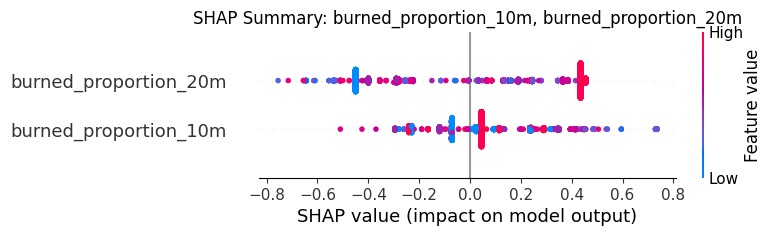


--- Using Features: ['burned_proportion_10m', 'burned_proportion_20m', 'burned_proportion_50m', 'burned_proportion_100m'] ---
Random Forest:
              precision    recall  f1-score   support

           0       0.67      0.65      0.66      2035
           1       0.66      0.69      0.67      2035

    accuracy                           0.67      4070
   macro avg       0.67      0.67      0.67      4070
weighted avg       0.67      0.67      0.67      4070

XGBoost:
              precision    recall  f1-score   support

           0       0.63      0.60      0.62      2035
           1       0.62      0.65      0.64      2035

    accuracy                           0.63      4070
   macro avg       0.63      0.63      0.63      4070
weighted avg       0.63      0.63      0.63      4070



ExactExplainer explainer: 4071it [02:29, 25.39it/s]                          


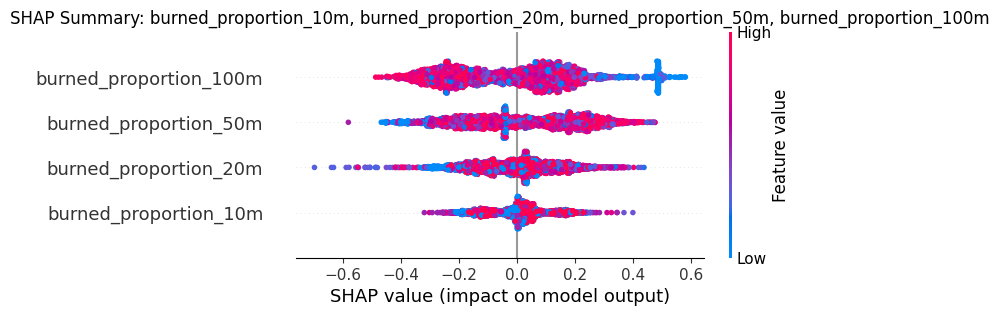


--- Using Features: ['burned_proportion_10m', 'burned_proportion_20m', 'burned_proportion_50m', 'burned_proportion_100m', 'ndvi_min_dist_m_x', 'ndvi_mean_dist_m_x'] ---
Random Forest:
              precision    recall  f1-score   support

           0       0.72      0.73      0.72      2034
           1       0.73      0.71      0.72      2033

    accuracy                           0.72      4067
   macro avg       0.72      0.72      0.72      4067
weighted avg       0.72      0.72      0.72      4067

XGBoost:
              precision    recall  f1-score   support

           0       0.69      0.65      0.67      2034
           1       0.67      0.71      0.69      2033

    accuracy                           0.68      4067
   macro avg       0.68      0.68      0.68      4067
weighted avg       0.68      0.68      0.68      4067



ExactExplainer explainer: 4068it [05:42, 11.50it/s]                          


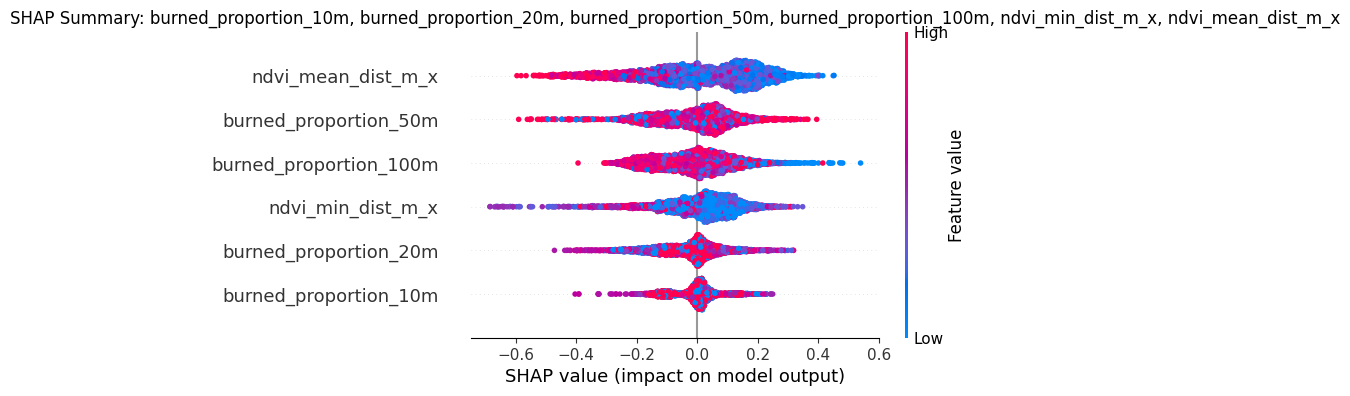


--- Using Features: ['ndvi_min_dist_m_x'] ---
Random Forest:
              precision    recall  f1-score   support

           0       0.57      0.38      0.45      2034
           1       0.54      0.72      0.61      2033

    accuracy                           0.55      4067
   macro avg       0.55      0.55      0.53      4067
weighted avg       0.55      0.55      0.53      4067

XGBoost:
              precision    recall  f1-score   support

           0       0.57      0.38      0.45      2034
           1       0.53      0.72      0.61      2033

    accuracy                           0.55      4067
   macro avg       0.55      0.55      0.53      4067
weighted avg       0.55      0.55      0.53      4067



ExactExplainer explainer: 4068it [00:51, 66.71it/s]                          


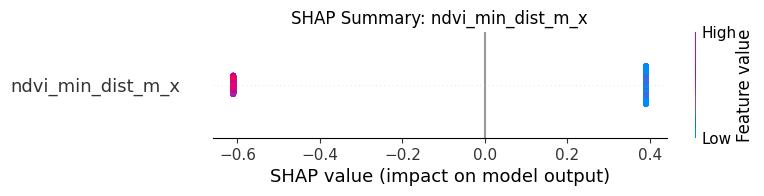


--- Using Features: ['ndvi_mean_dist_m_x'] ---
Random Forest:
              precision    recall  f1-score   support

           0       0.63      0.61      0.62      2034
           1       0.62      0.64      0.63      2033

    accuracy                           0.63      4067
   macro avg       0.63      0.63      0.63      4067
weighted avg       0.63      0.63      0.63      4067

XGBoost:
              precision    recall  f1-score   support

           0       0.58      0.55      0.56      2034
           1       0.57      0.60      0.58      2033

    accuracy                           0.57      4067
   macro avg       0.57      0.57      0.57      4067
weighted avg       0.57      0.57      0.57      4067



ExactExplainer explainer: 4068it [01:26, 41.51it/s]                          


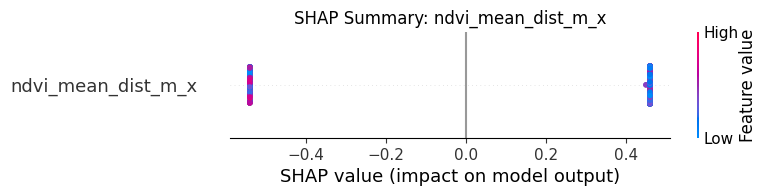


--- Using Features: ['ndvi_min_dist_m_x', 'ndvi_mean_dist_m_x'] ---
Random Forest:
              precision    recall  f1-score   support

           0       0.65      0.61      0.63      2034
           1       0.63      0.67      0.65      2033

    accuracy                           0.64      4067
   macro avg       0.64      0.64      0.64      4067
weighted avg       0.64      0.64      0.64      4067

XGBoost:
              precision    recall  f1-score   support

           0       0.61      0.51      0.56      2034
           1       0.58      0.68      0.63      2033

    accuracy                           0.59      4067
   macro avg       0.60      0.59      0.59      4067
weighted avg       0.60      0.59      0.59      4067



ExactExplainer explainer: 4068it [01:35, 38.54it/s]                          


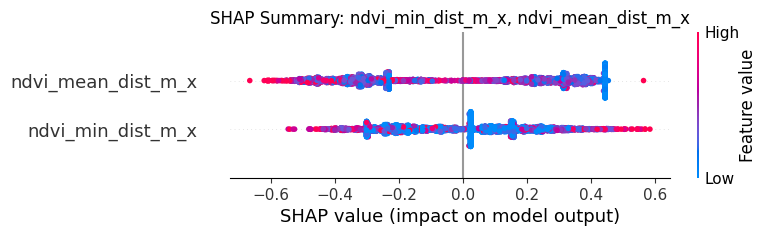

In [ ]:
# === Load Data ===
gpkg_path = "outputs/merged_structures.gpkg"
layer_name = "merged_structures"
gdf = gpd.read_file(gpkg_path, layer=layer_name)

# === Check class distribution ===
print("Class distribution:")
print(gdf['burned'].value_counts())

# === Define Feature Sets ===
feature_sets = [
    ["burned_proportion_10m"],
    ["burned_proportion_10m", "burned_proportion_20m"],
    ["burned_proportion_10m", "burned_proportion_20m", "burned_proportion_50m", "burned_proportion_100m"],
    ["burned_proportion_10m", "burned_proportion_20m", "burned_proportion_50m", "burned_proportion_100m", "ndvi_min_dist_m_x", "ndvi_mean_dist_m_x"],
    ["ndvi_min_dist_m_x"],
    ["ndvi_mean_dist_m_x"],
    ["ndvi_min_dist_m_x", "ndvi_mean_dist_m_x"]
]

target = 'burned'

# Run Models
rf_results = []
xgb_results = []

for features in feature_sets:
    print(f"\n--- Using Features: {features} ---")

    data = gdf.dropna(subset=features + [target])
    X = data[features]
    y = data[target]

    # Resample with SMOTE to balance the classes
    smote = SMOTE(random_state=42)
    X_resampled, y_resampled = smote.fit_resample(X, y)

    # Split into training/testing
    X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42, stratify=y_resampled)

    # Random Forest with balanced class weights
    rf = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
    rf.fit(X_train, y_train)
    rf_preds = rf.predict(X_test)

    print("Random Forest:")
    print(classification_report(y_test, rf_preds))
    rf_results.append({
        'Features': ", ".join(features),
        'Accuracy': accuracy_score(y_test, rf_preds)
    })

    # XGBoost with scale_pos_weight
    neg, pos = y_resampled.value_counts()
    scale_pos_weight = neg / pos

    xgb = XGBClassifier(eval_metric='logloss', scale_pos_weight=scale_pos_weight)
    xgb.fit(X_train, y_train)
    xgb_preds = xgb.predict(X_test)

    print("XGBoost:")
    print(classification_report(y_test, xgb_preds))
    xgb_results.append({
        'Features': ", ".join(features),
        'Accuracy': accuracy_score(y_test, xgb_preds)
    })

    # SHAP Summary Plot
    explainer = shap.Explainer(rf.predict, X_train)
    shap_values = explainer(X_test)

    if isinstance(shap_values.values, list):
        shap.summary_plot(shap_values[0], X_test, show=False)
    else:
        shap.summary_plot(shap_values, X_test, show=False)

    plt.title(f"SHAP Summary: {', '.join(features)}")
    plt.show()

# Confusion Matrices


Classification Report:

              precision    recall  f1-score   support

           0       0.72      0.73      0.72      2034
           1       0.73      0.71      0.72      2033

    accuracy                           0.72      4067
   macro avg       0.72      0.72      0.72      4067
weighted avg       0.72      0.72      0.72      4067



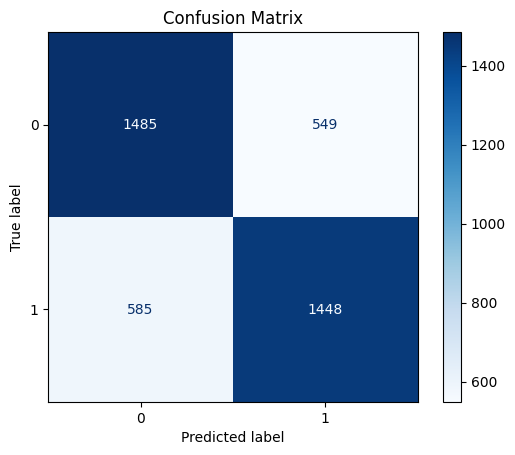

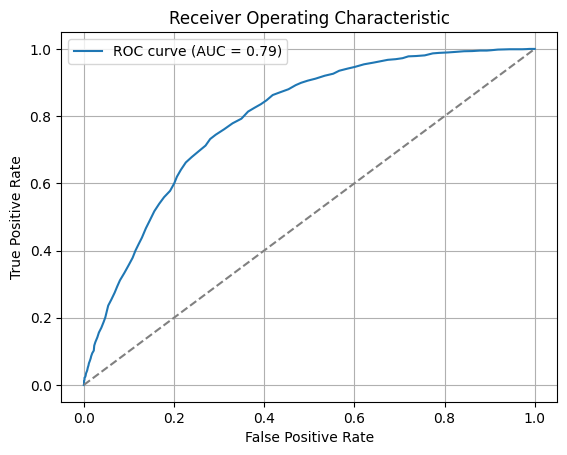

ExactExplainer explainer: 4068it [05:32, 11.91it/s]                          


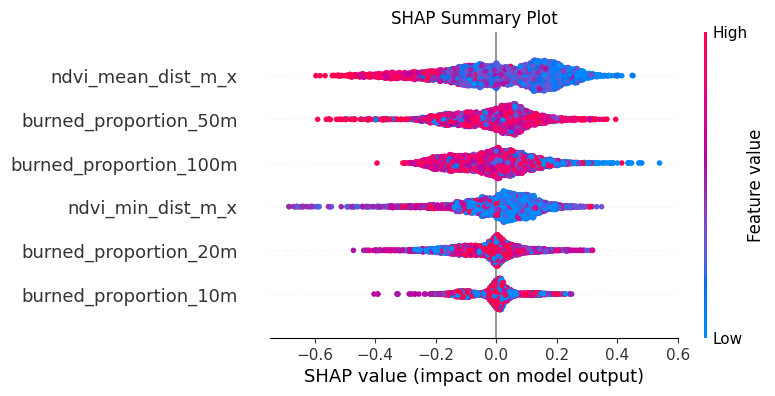

In [ ]:
# Load Data
gpkg_path = "outputs/merged_structures.gpkg"
layer_name = "merged_structures"
gdf = gpd.read_file(gpkg_path, layer=layer_name)

# Features and Target
features = [
    "burned_proportion_10m",
    "burned_proportion_20m",
    "burned_proportion_50m",
    "burned_proportion_100m",
    "ndvi_min_dist_m_x",
    "ndvi_mean_dist_m_x"
]
target = 'burned'

# Drop missing
data = gdf.dropna(subset=features + [target])
X = data[features]
y = data[target]

# SMOTE Resampling
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42, stratify=y_resampled)

# Train Model
model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluation
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

# ROC Curve
if hasattr(model, "predict_proba"):
    y_scores = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_scores)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.2f})")
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver Operating Characteristic")
    plt.legend()
    plt.grid(True)
    plt.show()

# SHAP Summary Plot
explainer = shap.Explainer(model.predict, X_train)
shap_values = explainer(X_test)
shap.summary_plot(shap_values, X_test, show=False)
plt.title("SHAP Summary Plot")
plt.show()

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.70      0.72      2044
           1       0.71      0.76      0.73      2023

    accuracy                           0.73      4067
   macro avg       0.73      0.73      0.73      4067
weighted avg       0.73      0.73      0.73      4067



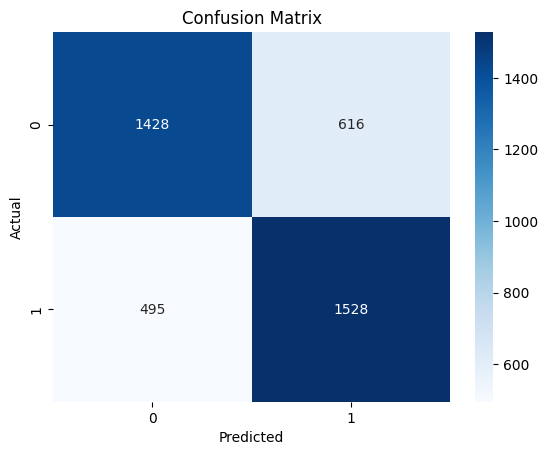

In [ ]:
# Load data
gdf = gpd.read_file("outputs/merged_structures.gpkg", layer="merged_structures")

# Define features and target
features = ['burned_proportion_10m', 'burned_proportion_20m', 'burned_proportion_50m', 'burned_proportion_100m', 'ndvi_min_dist_m_x', 'ndvi_mean_dist_m_x']
target = 'burned'

# Drop missing values
data = gdf.dropna(subset=features + [target])
X = data[features]
y = data[target]

# Address class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

# Hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best model
best_rf = grid_search.best_estimator_

# Predictions
y_pred = best_rf.predict(X_test)

# Evaluation
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
